In [7]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

device = 'mps' if torch.backends.mps.is_available() else 'cpu'

def generate_images(generator, latent_dim, num_images=25):
    z = torch.randn(num_images, latent_dim, device=device)
    gen_imgs = generator(z).detach().cpu()

    grid = make_grid(gen_imgs, nrow=5, normalize=True, value_range=(-1, 1))
    return grid

def show_images(grid, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.title(title)
    plt.axis("off")
    plt.show()


In [8]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # Construct generator. You should experiment with your model,
        # but the following is a good start:
        #   Linear args.latent_dim -> 128
        #   LeakyReLU(0.2)
        #   Linear 128 -> 256
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 256 -> 512
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 512 -> 1024
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 1024 -> 768
        #   Output non-linearity
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()  
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(img.size(0), 1, 28, 28)

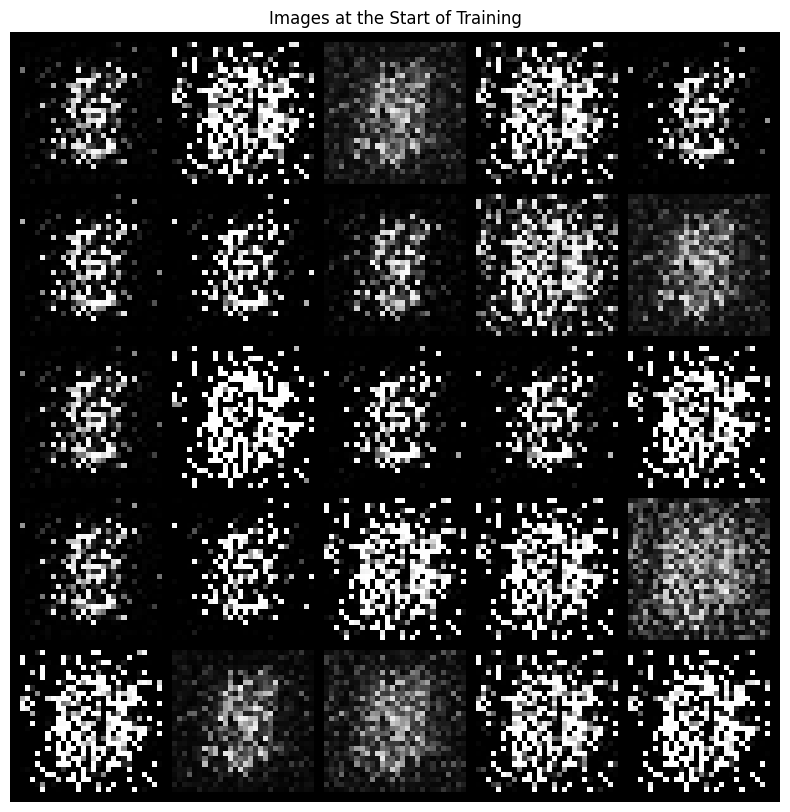

In [10]:
generator = Generator()
generator.load_state_dict(torch.load("generator_start.pt"))
generator.eval()
generator.to(device)

torch.manual_seed(42) 
start_grid = generate_images(generator, 100)
show_images(start_grid, title="Images at the Start of Training")

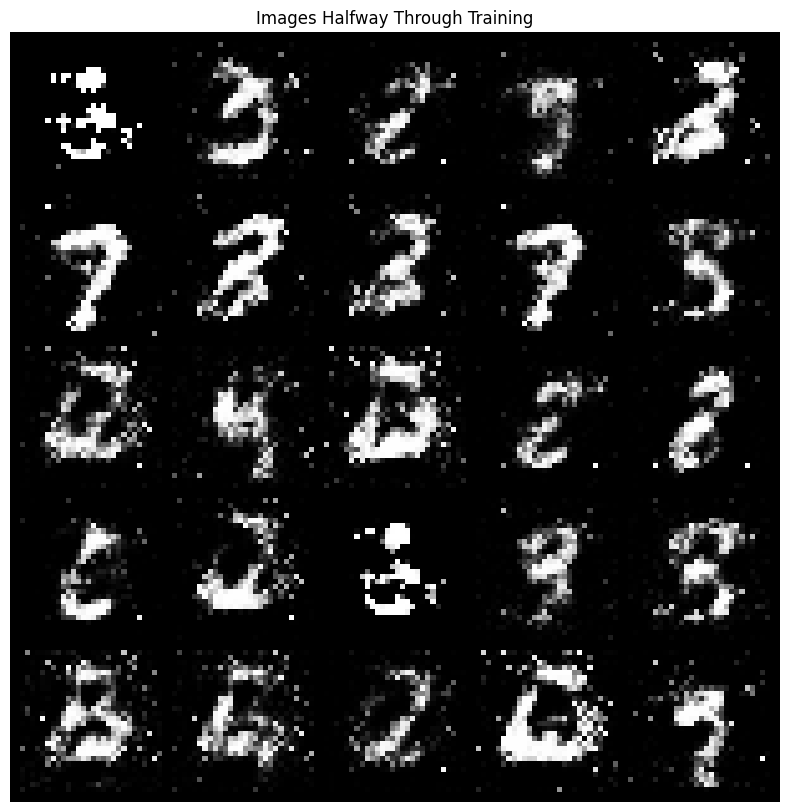

In [11]:
generator = Generator()
generator.load_state_dict(torch.load("generator_halfway.pt"))
generator.eval()
generator.to(device)

torch.manual_seed(123)
halfway_grid = generate_images(generator, 100)
show_images(halfway_grid, title="Images Halfway Through Training")


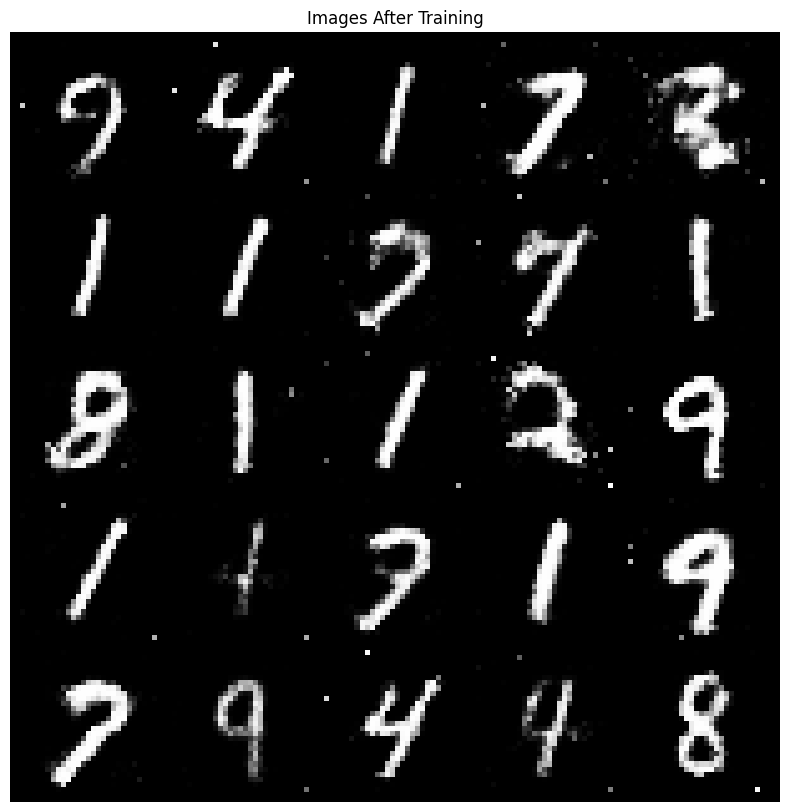

In [12]:
generator = Generator()
generator.load_state_dict(torch.load("mnist_generator.pt"))
generator.eval()
generator.to(device)

torch.manual_seed(789)
end_grid = generate_images(generator, 100)
show_images(end_grid, title="Images After Training")